# Topic Modelling with Latent Dirichlet Allocation (LDA)

Topic modeling is a type of statistical modeling for discovering the topics that occur in a collection of documents. By doing topic modeling, we build clusters of words rather than clusters of texts.

LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

- psi, the distribution of words for each topic K

- phi, the distribution of topics for each document i

## Tokenize text for LDA
To use ```space.load('en')```, download it using the following:

```python3 -m spacy download en```

In [25]:
import spacy

spacy.load('en')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        # elif token.like_url:
        #     lda_tokens.append('URL')
        # elif token.orth_.startswith('@'):
        #     lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

## Lemmatization using NLTK WordNet

Using ```WordNetLemmatizer``` to get the root word.

In [26]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/asadmahmood/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Getting a list of StopWords 

In [27]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/asadmahmood/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text pre-processing

Following steps are followed for text pre-processing before using LDA:

1. Tokenize text using our tokenizer above
1. Remove tokens of length less than 4
1. Remove tokens that are stop words
1. Reduce tokens to their base form using our Lemmatizer above

In [28]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [(token) for token in tokens]
    return tokens


## Processing Pubmed Articles

In [29]:
import random
import pandas as pd

text_data = []
pubmed_dataset = pd.read_csv('Pubmed_Articles.csv', encoding = "ISO-8859-1")
print("Total Articles: ", len(pubmed_dataset))


Total Articles:  300


In [30]:
for index, row in pubmed_dataset.iterrows():
    tokens = prepare_text_for_lda(str(row['Text']))
    if random.random() > .99:
        print(tokens)
    text_data.append(tokens)

['virology', '17-restricted', 'mutation', 'abrogates', 'correct', 'epitope', 'processing', 'presentation', 'without', 'replicative', 'fitness', 'cytotoxic', 'lymphocytes', 'important', 'controlling', 'virus', 'replication', 'infected', 'humans', 'monkeys', 'respectively', 'three', 'studied', 'determinants', '01-restricted', 'epitopes', '17-restricted', 'epitope', 'point', 'mutations', 'leading', 'amino', 'replacements', 'epitopes', 'reported', 'mediate', 'escape', 'control', 'found', 'synthetic', 'peptides', 'containing', 'mutations', 'longer', 'recognized', 'respective', 'described', 'replacement', 'terminal', 'amino', 'residue', 'epitope', 'moderately', 'affected', 'recognition', 'variant', 'peptide', 'attempt', 'dissect', 'mechanism', 'escape', 'mutation', 'investigated', 'effect', 'mutation', 'recognition', 'cells', 'infected', 'engineered', 'mac)239', 'contained', 'mutation', 'although', 'mutant', 'virus', 'infected', 'efficiently', 'replicated', 'rhesus', 'macaque', 'cells', 'mut

## Creating BOW with Dictionary

Doc2bow: Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples

In [31]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
print(corpus[0])
print("-----")
print(corpus[1])
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 5), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 2), (24, 1), (25, 2), (26, 3), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 2), (46, 2), (47, 1), (48, 1), (49, 1), (50, 4), (51, 1), (52, 4), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 3), (72, 6), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 3), (95, 1), (96, 2)]
-----
[(3, 1), (19, 1), (22, 1), (56, 1), (60, 1), (81, 1), (82, 1), (92, 1), (93, 2), (97, 1), (98, 2), (99, 1), (100, 1), (101, 4), (1

## Training LDA model

In [32]:
import gensim
NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15, random_state=42)
ldamodel.save('model5.gensim')


## Compute Model Perplexity and Coherence Score

In [33]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.295354807963214

Coherence Score:  0.4868587444391292


## Finding Model with Optimal K - Number of Topics

In [34]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        perplexity = model.log_perplexity(corpus)

        perplexity_values.append(perplexity)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values, perplexity_values

In [35]:
# Can take a long time to run.
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_data, start=2, limit=40, step=2)

## Coherence

Coherence measures the relative distance between words within a topic.

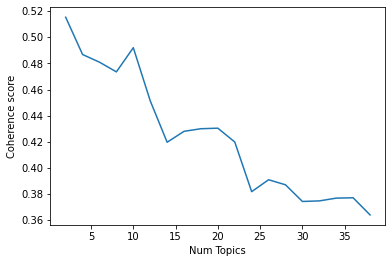

In [36]:
from matplotlib import pyplot as plt

# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")

plt.show()

## Perplexity

Not Often used to pick LDA model. As per https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

"However, recent studies have shown that predictive likelihood (or equivalently, perplexity) and human judgment are often not correlated, and even sometimes slightly anti-correlated."

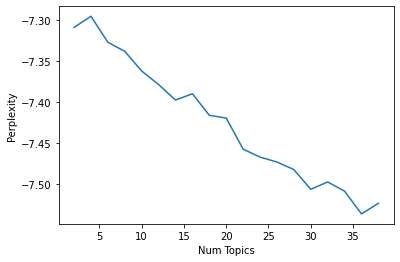

In [37]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity")

plt.show()

## Top words in each Topic

In [38]:
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)
    print('----------------------')

(0, '0.041*"cells" + 0.025*"il-18" + 0.024*"tumor" + 0.014*"gamma" + 0.012*"il-12" + 0.011*"antitumor" + 0.009*"cancer" + 0.007*"effect" + 0.007*"cytokine" + 0.007*"production"')
----------------------
(1, '0.022*"cells" + 0.015*"il-18" + 0.014*"gamma" + 0.011*"expression" + 0.010*"patients" + 0.008*"infection" + 0.008*"production" + 0.007*"activation" + 0.007*"infected" + 0.006*"tuberculosis"')
----------------------
(2, '0.017*"vaccine" + 0.013*"responses" + 0.012*"gamma" + 0.009*"patients" + 0.007*"pituitary" + 0.006*"study" + 0.006*"hiv-1" + 0.006*"cells" + 0.006*"specific" + 0.006*"interferon"')
----------------------
(3, '0.022*"responses" + 0.017*"hiv-1" + 0.017*"specific" + 0.014*"cells" + 0.012*"infection" + 0.011*"virus" + 0.010*"infected" + 0.010*"immune" + 0.009*"gamma" + 0.008*"vaccine"')
----------------------


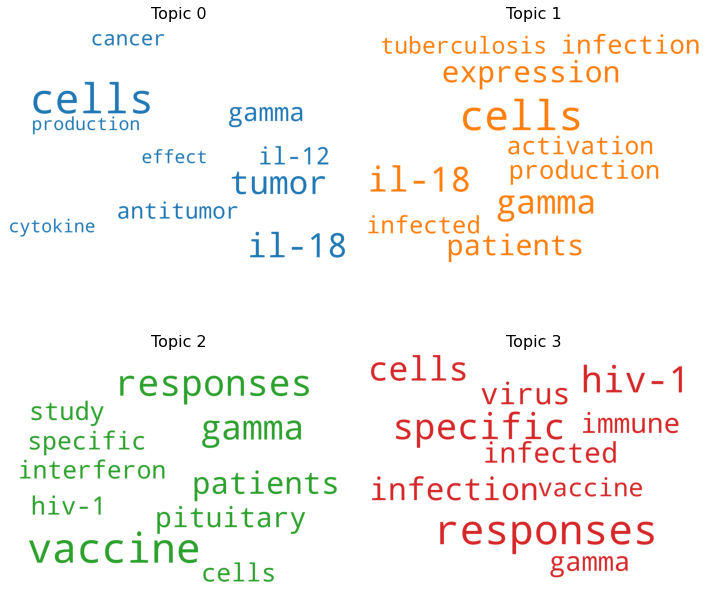

In [39]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Testing on new document

In [40]:
new_doc = 'Increase in efficacy of cancer radiotherapy by combination with whole-body low dose irradiation'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(13, 1), (15, 1), (26, 1), (41, 1), (46, 1), (72, 1), (96, 1)]
[(0, 0.7175416), (1, 0.033276316), (2, 0.21597555), (3, 0.03320654)]


## Creating Visualization for Topics

In [41]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, 'lda.html')